# Signate【練習問題】自動車の走行距離予測

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### ファイル読み込み

In [2]:
train = pd.read_csv('train.tsv', delimiter='\t')
test = pd.read_csv('test.tsv', delimiter='\t')
sample = pd.read_csv('sample_submit.csv', header = None)

In [3]:
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [4]:
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1,6,145.0,76.00,3160.0,19.6,81,2,volvo diesel
1,2,6,250.0,98.00,3525.0,19.0,77,1,ford granada
2,4,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw)
4,6,4,97.0,88.00,2100.0,16.5,72,3,toyota corolla 1600 (sw)


In [5]:
sample.head()

,0,1
0,1,19.8
1,2,31.3
2,4,31.9
3,5,20.0
4,6,16.5


### 可視化

In [6]:
train.corr()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
id,1.000000,-0.052688,0.103419,0.098416,0.070563,-0.087649,-0.093272,-0.031421
mpg,-0.052688,1.000000,-0.770160,-0.804635,-0.820660,0.379721,0.568471,0.533671
cylinders,0.103419,-0.770160,1.000000,0.950600,0.893256,-0.479561,-0.303462,-0.497373
displacement,0.098416,-0.804635,0.950600,1.000000,0.933038,-0.523955,-0.329817,-0.579805
weight,0.070563,-0.820660,0.893256,0.933038,1.000000,-0.401757,-0.265562,-0.535893
acceleration,-0.087649,0.379721,-0.479561,-0.523955,-0.401757,1.000000,0.194854,0.189193
model year,-0.093272,0.568471,-0.303462,-0.329817,-0.265562,0.194854,1.000000,0.124279
origin,-0.031421,0.533671,-0.497373,-0.579805,-0.535893,0.189193,0.124279,1.000000


In [9]:
invalid_id_list = train[train['horsepower'] == '?'].index

In [10]:
invalid_id_list

Int64Index([24, 113, 145, 175], dtype='int64')

In [12]:
train_temp = train.drop(invalid_id_list)

In [13]:
train_temp['horsepower'] = train_temp['horsepower'].astype(float)

<AxesSubplot:ylabel='Frequency'>

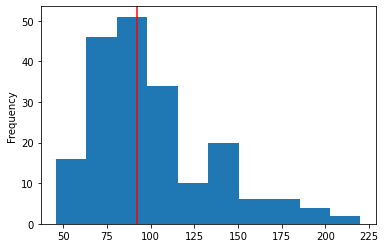

In [17]:
plt.axvline(x=train_temp['horsepower'].median(), color='red')
train_temp['horsepower'].plot.hist()

In [18]:
train_horse_median = train_temp['horsepower'].median()

In [20]:
invalid_id_list = test[test['horsepower'] == '?'].index

In [21]:
test_temp = test.drop(invalid_id_list)

In [22]:
test_temp['horsepower'] = test_temp['horsepower'].astype(float)

In [23]:
test_horse_median = test_temp['horsepower'].median()

In [24]:
train[train['horsepower'] == '?'] = train_horse_median

In [25]:
test[test['horsepower'] == '?'] = test_horse_median

In [27]:
train['horsepower'] = train['horsepower'].astype(float)
test['horsepower'] = test['horsepower'].astype(float)

### 特徴量の追加

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   mpg           199 non-null    float64
 2   cylinders     199 non-null    int64  
 3   displacement  199 non-null    float64
 4   horsepower    199 non-null    float64
 5   weight        199 non-null    float64
 6   acceleration  199 non-null    float64
 7   model year    199 non-null    int64  
 8   origin        199 non-null    int64  
 9   car name      199 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 15.7+ KB


In [29]:
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel


In [30]:
train['horsepower'] = train['horsepower'].astype(float)

In [31]:
train['horse_weight'] = train['horsepower'] / train['weight']

In [32]:
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horse_weight
0,0,29.0,4,135.0,84.0,2525.0,16.0,82,1,dodge aries se,0.033267
1,3,31.9,4,89.0,71.0,1925.0,14.0,79,2,vw rabbit custom,0.036883
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii,0.036860
3,11,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt,0.035294
4,13,37.7,4,89.0,62.0,2050.0,17.3,81,3,toyota tercel,0.030244


In [33]:
test['horsepower'] = test['horsepower'].astype(float)

In [34]:
test['horse_weight'] = test['horsepower'] / test['weight']
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horse_weight
0,1,6,145.0,76.0,3160.0,19.6,81,2,volvo diesel,0.024051
1,2,6,250.0,98.0,3525.0,19.0,77,1,ford granada,0.027801
2,4,4,119.0,92.0,2434.0,15.0,80,3,datsun 510 hatchback,0.037798
3,5,6,258.0,110.0,2962.0,13.5,71,1,amc hornet sportabout (sw),0.037137
4,6,4,97.0,88.0,2100.0,16.5,72,3,toyota corolla 1600 (sw),0.041905


In [35]:
train.corr()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horse_weight
id,1.000000,-0.145499,-0.118054,0.124858,0.087414,0.135308,-0.150807,-0.138426,-0.135548,-0.132938
mpg,-0.145499,1.000000,0.708078,-0.603918,-0.524472,-0.803216,0.814468,0.706492,0.798784,0.772038
cylinders,-0.118054,0.708078,1.000000,-0.006163,0.076203,-0.325716,0.946852,0.474453,0.985029,0.991602
displacement,0.124858,-0.603918,-0.006163,1.000000,0.891385,0.889880,-0.253183,-0.349082,-0.168444,-0.122439
horsepower,0.087414,-0.524472,0.076203,0.891385,1.000000,0.800511,-0.195228,-0.348906,-0.063384,-0.014341
weight,0.135308,-0.803216,-0.325716,0.889880,0.800511,1.000000,-0.510551,-0.432352,-0.466005,-0.431901
acceleration,-0.150807,0.814468,0.946852,-0.253183,-0.195228,-0.510551,1.000000,0.537750,0.971740,0.963144
model year,-0.138426,0.706492,0.474453,-0.349082,-0.348906,-0.432352,0.537750,1.000000,0.518774,0.501314
origin,-0.135548,0.798784,0.985029,-0.168444,-0.063384,-0.466005,0.971740,0.518774,1.000000,0.997396
horse_weight,-0.132938,0.772038,0.991602,-0.122439,-0.014341,-0.431901,0.963144,0.501314,0.997396,1.000000


### モデルの準備

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [37]:
model = xgb.XGBRegressor()

In [38]:
train = train.drop(['id', 'car name'], axis = 1)
test = test.drop(['id', 'car name'], axis = 1)

In [39]:
trainX = train.copy()
y = train['mpg']
trainX = train.drop('mpg', axis=1)
testX = test.copy()

### パラメータのサーチ

In [40]:
gcv = GridSearchCV(model, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1, n_jobs=-1, return_train_score=True)

In [41]:
gcv.fit(trainX, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [42]:
gcv.best_params_

{'max_depth': 6, 'n_estimators': 50}

### ベストパラメータで改めてモデル作成

### 訓練データで精度チェック

In [43]:
pred_train = gcv.predict(trainX)

<AxesSubplot:>

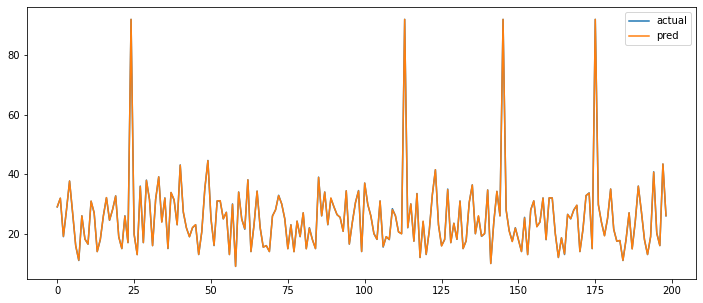

In [45]:
train_value = y.values
_df = pd.DataFrame({'actual':train_value,'pred':pred_train})
_df.plot(figsize=(12,5))

In [46]:
train_value

array([29. , 31.9, 19. , 28. , 37.7, 27. , 16. , 11. , 26. , 18.2, 16.5,
       30.9, 27. , 14. , 18. , 26. , 32.1, 24.5, 28.1, 32.7, 19. , 15. ,
       26. , 17. , 92. , 19.8, 13. , 36. , 17. , 38. , 31.5, 16. , 31.5,
       39.1, 24. , 32. , 15. , 33.8, 31.3, 23. , 43.1, 27.2, 22. , 19. ,
       22. , 23. , 13. , 20.6, 35.1, 44.6, 25. , 16. , 31. , 31. , 25. ,
       27.2, 13. , 30. ,  9. , 34. , 25. , 21.5, 38.1, 14. , 23. , 34.3,
       22. , 15.5, 16. , 14. , 26. , 28. , 32.9, 30. , 25. , 15. , 23. ,
       14. , 24.2, 19. , 27. , 15. , 22. , 18. , 15. , 39. , 26. , 34. ,
       23. , 31.8, 29. , 26.4, 25.5, 20.8, 34.4, 16.5, 24. , 30.5, 34.5,
       14. , 37. , 29.8, 26. , 20. , 18.1, 31. , 15.5, 19. , 18. , 28.4,
       26. , 20.6, 20. , 92. , 22. , 30. , 17.5, 33.5, 12. , 24. , 13. ,
       21. , 33. , 41.5, 23. , 16. , 18. , 35. , 17. , 23.5, 18.1, 31. ,
       15. , 17.6, 30.5, 36.4, 20. , 25.8, 19.1, 20. , 34.7, 10. , 24. ,
       34.2, 26. , 92. , 28. , 21. , 17.5, 22. , 18

In [47]:
pred_train

array([29.05239  , 31.934063 , 19.13587  , 28.011375 , 37.68087  ,
       27.122673 , 15.939069 , 11.110921 , 25.983875 , 18.194714 ,
       16.510681 , 30.95588  , 27.031574 , 13.983873 , 18.088507 ,
       25.995844 , 32.140556 , 24.558876 , 28.118313 , 32.670135 ,
       18.930079 , 15.0090685, 25.930092 , 17.014755 , 92.00113  ,
       19.815765 , 12.954742 , 35.82563  , 17.017466 , 37.8962   ,
       31.375114 , 15.980515 , 31.584242 , 39.082485 , 23.893826 ,
       31.972254 , 15.065923 , 33.857376 , 31.426506 , 23.02262  ,
       43.006287 , 27.371769 , 21.980421 , 18.978445 , 22.104275 ,
       23.026766 , 13.031075 , 20.599634 , 35.176006 , 44.543358 ,
       25.081745 , 16.102713 , 30.993126 , 31.090538 , 24.990705 ,
       27.165926 , 13.004689 , 29.849867 ,  9.038427 , 33.959652 ,
       24.869894 , 21.659763 , 38.09175  , 13.990921 , 22.939066 ,
       34.30508  , 21.981302 , 15.478681 , 15.984601 , 14.011651 ,
       25.872515 , 28.0129   , 32.779438 , 30.016582 , 25.0351

### テストデータで予測

In [48]:
pred_test =  gcv.predict(testX)

In [49]:
pred_test

array([25.265945 , 18.638067 , 37.171364 , 18.922977 , 27.556877 ,
       23.916826 , 13.395185 , 20.095346 , 24.081167 , 20.939972 ,
       13.177593 , 27.533304 , 13.428914 , 33.19555  , 33.385418 ,
       15.426258 , 22.001719 , 27.129383 , 14.493505 , 31.09746  ,
       26.610743 , 39.82542  , 16.070383 , 12.157365 , 14.083621 ,
       13.470019 , 10.751539 , 18.324545 , 28.216032 , 28.835459 ,
       34.104733 , 17.076672 , 37.677418 , 12.219443 , 17.212679 ,
       30.21109  , 33.238884 , 17.983356 , 28.636276 , 40.755096 ,
       12.7072935, 29.096828 , 23.30457  , 29.497448 , 20.619856 ,
       35.945503 , 34.214    , 17.408867 , 25.085379 , 23.166775 ,
       24.56616  , 25.581312 , 32.551517 , 18.378704 , 27.538689 ,
       13.827934 , 14.291791 , 31.843006 , 14.050541 , 15.854032 ,
       14.447309 , 26.98759  , 30.916214 , 17.496672 , 26.30091  ,
       12.963869 , 35.26227  , 28.088345 , 19.586704 , 14.6591835,
       91.91272  , 33.149693 , 32.790268 , 12.368199 , 32.0825

In [50]:
sample[1] = pred_test

In [51]:
sample.to_csv('submit1.csv', header=None, index=None)